In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
# Load dataset
df = pd.read_csv(r"C:\Users\bbuser\Downloads\Fish.csv")

In [10]:

# Check for missing values
print(df.isnull().sum())

# Encode categorical feature (Species)
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

# Define features and target
X = df.drop("Weight", axis=1)
y = df["Weight"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


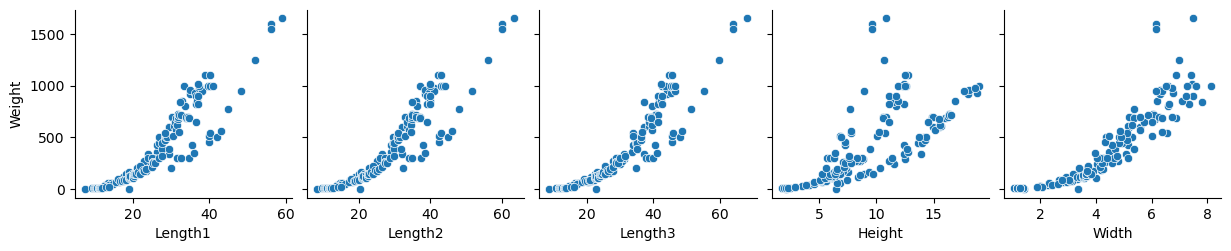

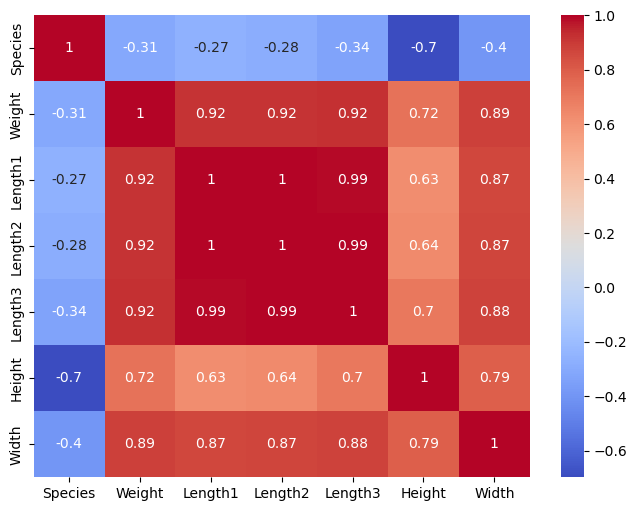

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plots
sns.pairplot(df, x_vars=["Length1","Length2","Length3","Height","Width"], y_vars="Weight")

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Outlier detection (example using IQR on Weight)
Q1 = df["Weight"].quantile(0.25)
Q3 = df["Weight"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Weight"] < (Q1 - 1.5 * IQR)) | (df["Weight"] > (Q3 + 1.5 * IQR))]

# Feature engineering
df["Length_Width"] = df["Length2"] * df["Width"]
df["Height_Ratio"] = df["Height"] / df["Length2"]


In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {}

# Linear Regression
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
models["Linear"] = (np.sqrt(mean_squared_error(y_test, y_pred_lin)), r2_score(y_test, y_pred_lin))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
models["Ridge"] = (np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
models["Lasso"] = (np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso))

# Polynomial Regression (degree=2)
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
models["Polynomial (deg=2)"] = (np.sqrt(mean_squared_error(y_test, y_pred_poly)), r2_score(y_test, y_pred_poly))

# Print results
for name, (rmse, r2) in models.items():
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.2f}")


Linear: RMSE=117.17, R²=0.90
Ridge: RMSE=117.23, R²=0.90
Lasso: RMSE=116.21, R²=0.91
Polynomial (deg=2): RMSE=61.71, R²=0.97


C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(
